In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel("data/xlsx_data/DatasetTrainingMatif20250812.xlsx")
# for lag in range(1, 6):
#     df[f'Matif_Prices_lag_{lag}'] = df['Matif_Prices'].shift(lag)

window_days = {'1m': 21, '2m': 42, '3m': 63, '6m': 126}
for label, window in window_days.items():
    df[f'Matif_Prices_ma_{label}'] = df['Matif_Prices'].rolling(window=window, min_periods=1).mean()
df = df.dropna()
display(df.describe())

Period        Month  \
count                           6914  6914.000000   
mean   2012-02-14 21:30:27.596181760     6.529216   
min              1998-08-12 00:00:00     1.000000   
25%              2005-05-17 06:00:00     4.000000   
50%              2012-02-11 12:00:00     7.000000   
75%              2018-11-14 18:00:00    10.000000   
max              2025-08-12 00:00:00    12.000000   
std                              NaN     3.434422   

       Supply_to_Demand_World_Less_China_CoarseGrains  \
count                                     6914.000000   
mean                                         1.103689   
min                                          1.069316   
25%                                          1.089272   
50%                                          1.103891   
75%                                          1.117832   
max                                          1.147416   
std                                          0.017550   

       Consumption_per_Capita_US_Wheat_+_CoarseGrains  \
count                                     6914.000000   
mean                                       493.208562   
min                                        365.624480   
25%                                        452.310691   
50%                                        471.436411   
75%                                        547.234986   
max                                        626.494191   
std                                         58.495156   

       Consumption_per_Capita_MEwUS_CornFeed  \
count                            6914.000000   
mean                              349.221010   
min                               262.205552   
25%                               296.710953   
50%                               329.596165   
75%                               408.607132   
max                               439.742872   
std                                55.007795   

       Consumption_To_Production_ME_CoarseGrains  \
count                                6914.000000   
mean                                    0.673431   
min                                     0.550545   
25%                                     0.613306   
50%                                     0.677297   
75%                                     0.732384   
max                                     0.878543   
std                                     0.074277   

       Consumption_To_Production_MEwoEU_CoarseGrains  \
count                                    6914.000000   
mean                                        0.673431   
min                                         0.550545   
25%                                         0.613306   
50%                                         0.677297   
75%                                         0.732384   
max                                         0.878543   
std                                         0.074277   

       Supply_per_Capita_MEwoEU_Corn  Supply_to_Demand_MIwoChina_CoarseGrains  \
count                    6914.000000                              6914.000000   
mean                      417.076000                                 1.109985   
min                       258.086032                                 1.078000   
25%                       334.793021                                 1.091706   
50%                       439.232055                                 1.109452   
75%                       481.958374                                 1.123110   
max                       545.034876                                 1.156775   
std                        79.614079                                 0.019481   

       Stock_to_Use_MIwoChina_CoarseGrains  ...  Long_term_interest_rates  \
count                          6914.000000  ...               6914.000000   
mean                              0.114445  ...                  2.399676   
min                               0.080329  ...                 -0.649091   
25%                               0.094214  ...                  0.555790   
50

### Visual representation fo Matif Price movements through the years

No value beyond visual clarity

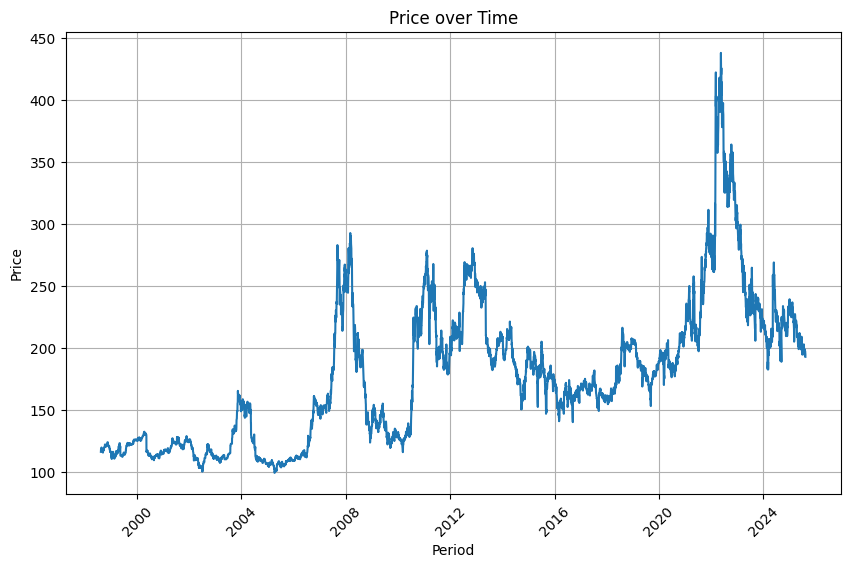

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df['Period'], df['Matif_Prices'])
plt.xlabel("Period")
plt.ylabel("Price")
plt.title("Price over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### A correlation heatmap of the all the features

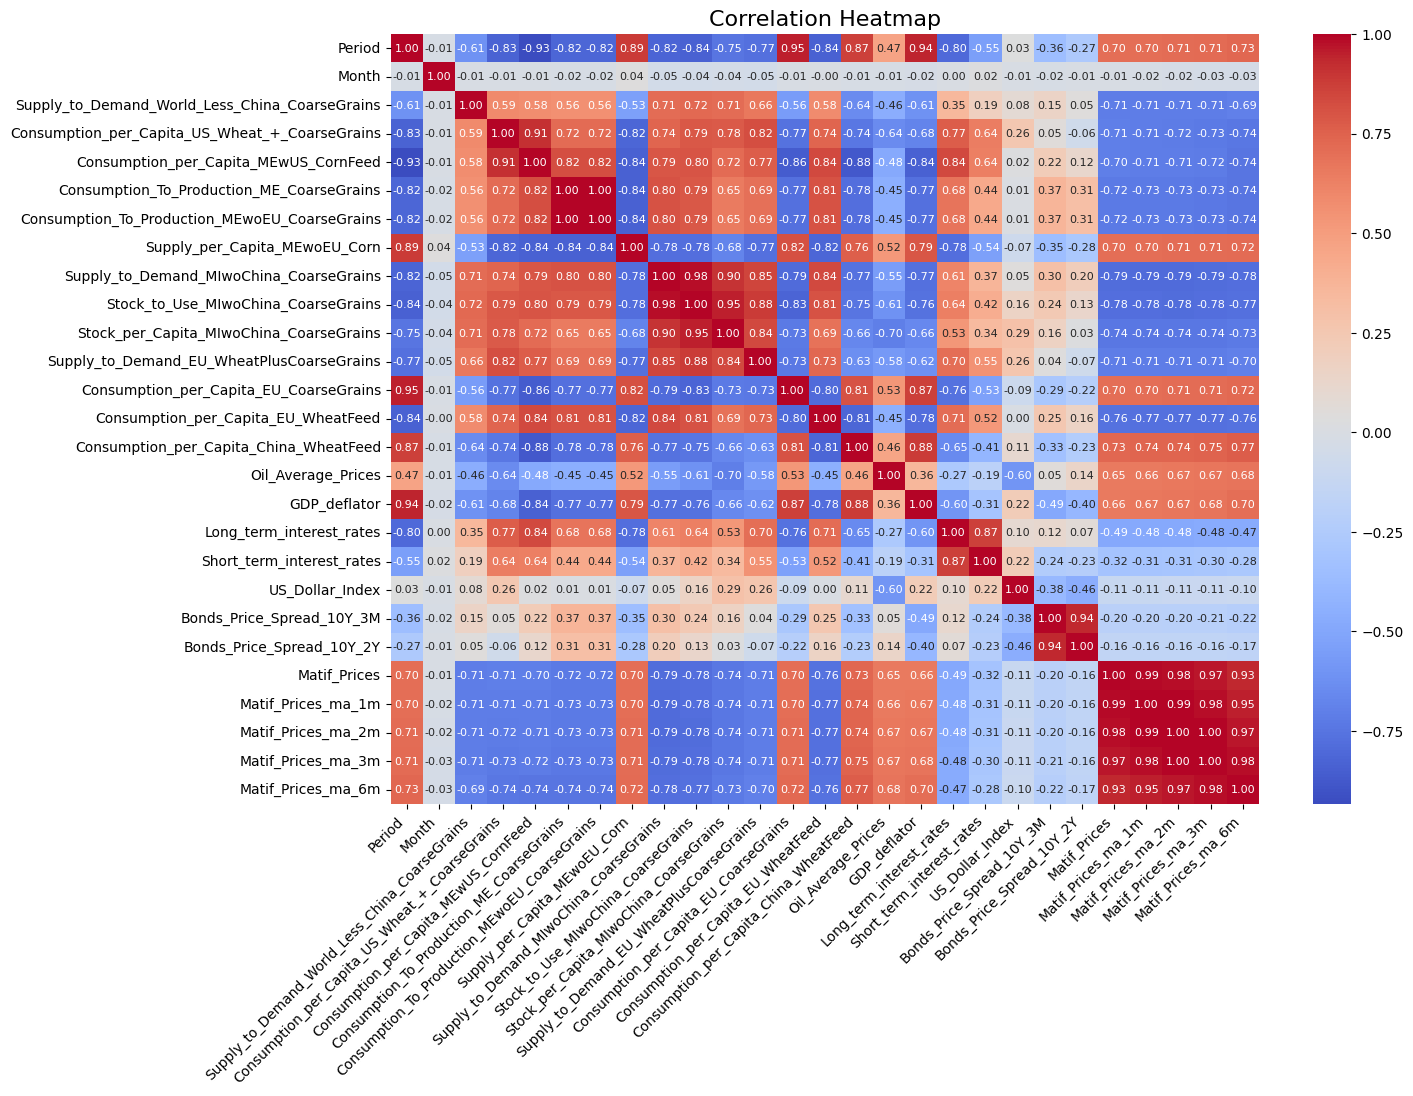

In [4]:
corr = df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

### Same heatmap with no low correlation features masked

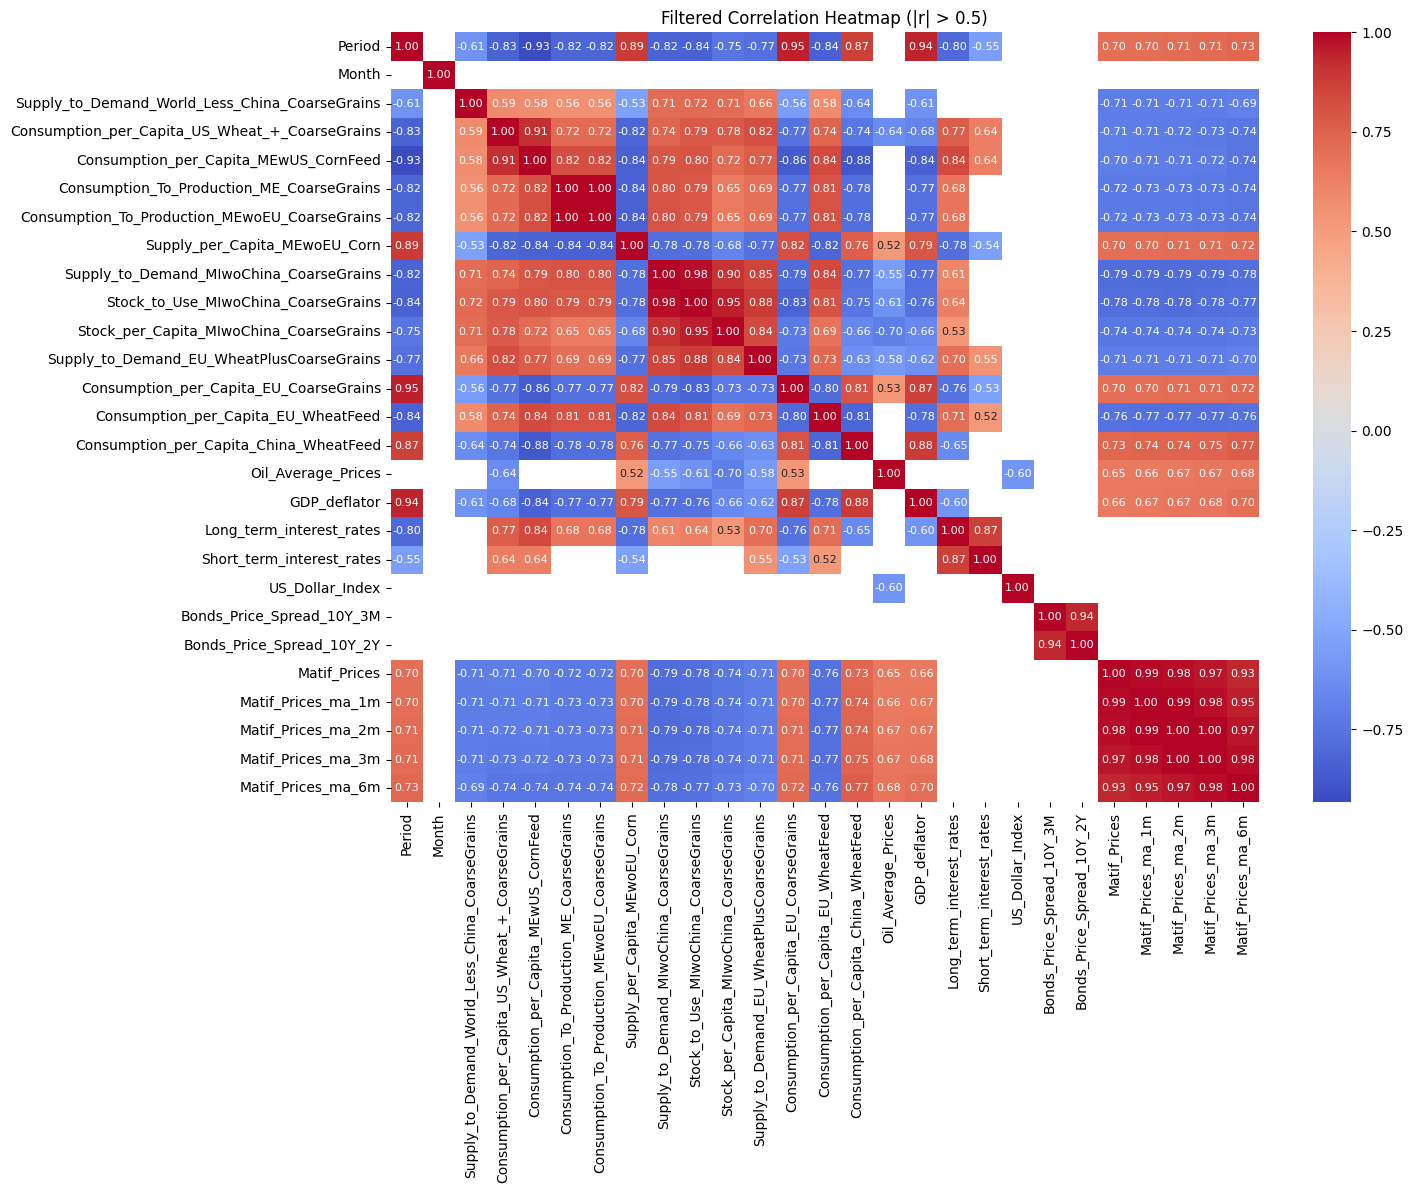

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", 
            mask=abs(corr) < 0.5,  # hide weak correlations
            annot_kws={"size":8})

plt.title("Filtered Correlation Heatmap (|r| > 0.5)")
plt.show()


### Correlation heatmap with clustered features

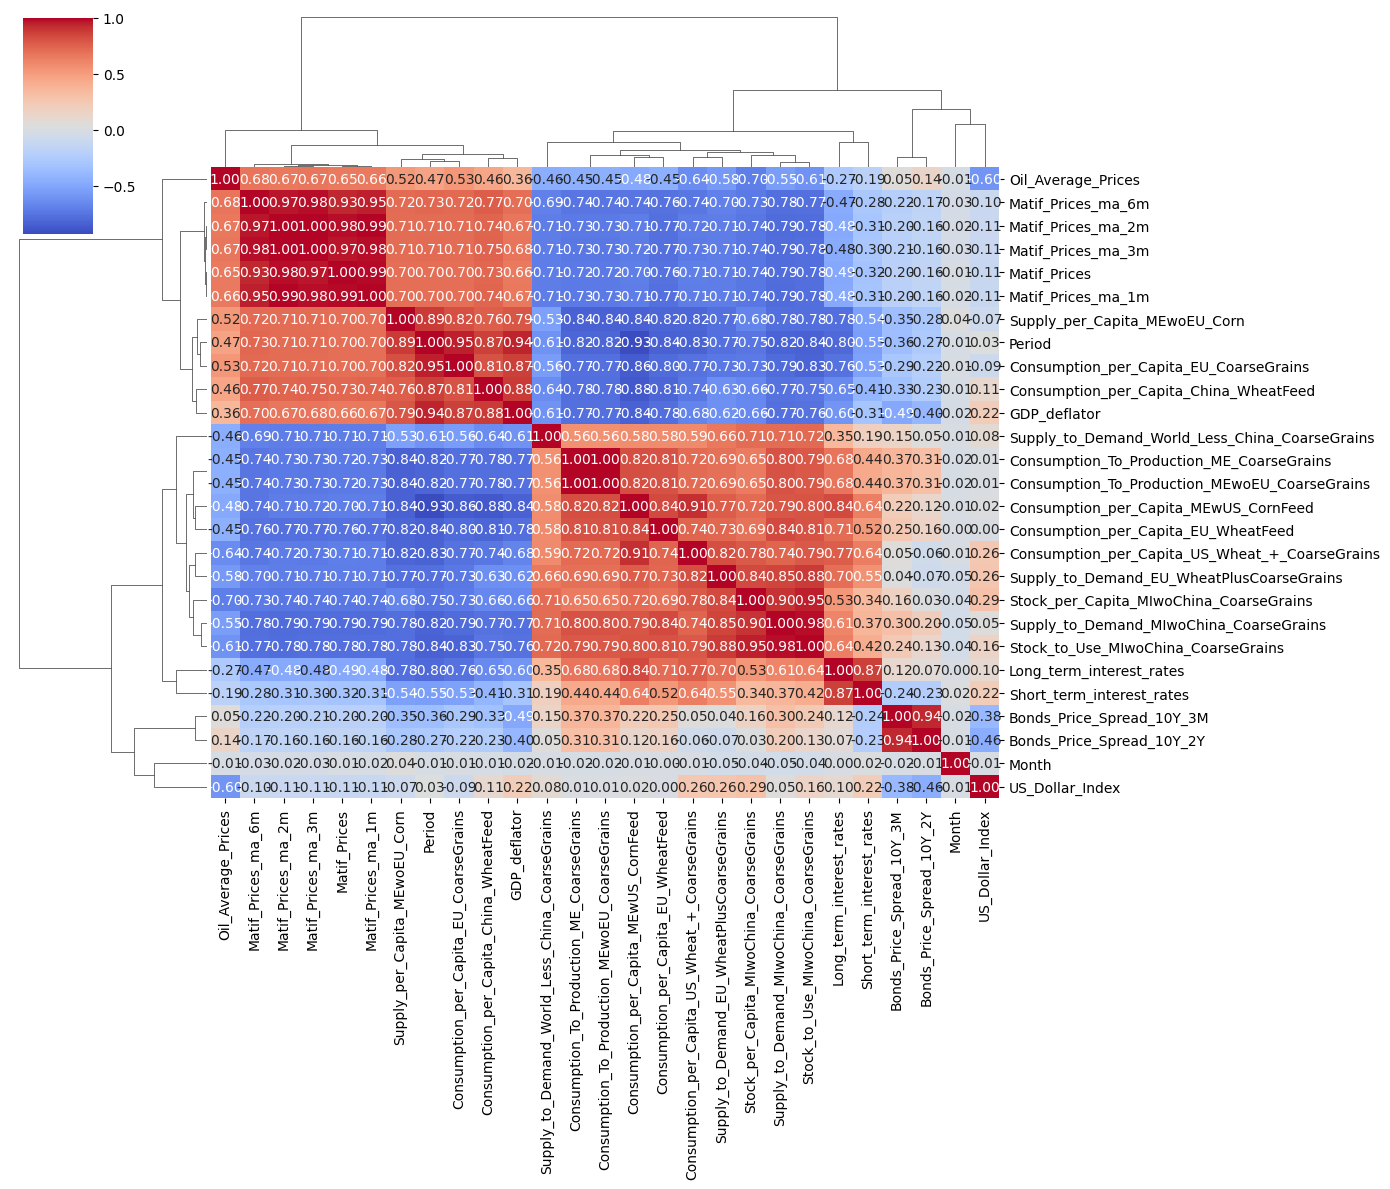

In [6]:
sns.clustermap(corr, cmap="coolwarm", annot=True, fmt=".2f", figsize=(14,12))

### Checking for seasonality, not very statistically sound

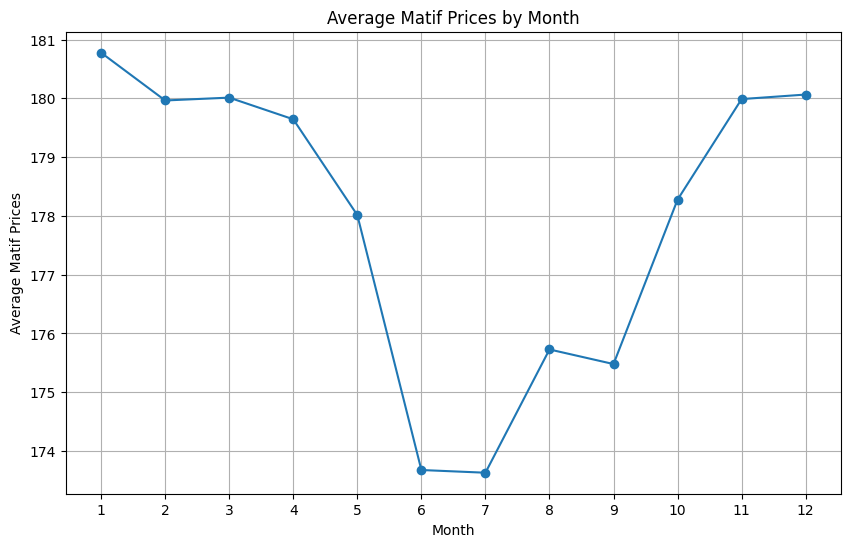

In [7]:
monthly_avg = df.groupby('Month')['Matif_Prices'].mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Matif Prices")
plt.title("Average Matif Prices by Month")
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

### Target vs Feature Scatters of the top most correlated features with the Target (MATIF PRICE)

Use to interpret patterns

Matif_Prices_ma_1m                        0.989415
Matif_Prices_ma_2m                        0.977803
Matif_Prices_ma_3m                        0.966014
Matif_Prices_ma_6m                        0.933620
Consumption_per_Capita_China_WheatFeed    0.730971
Name: Matif_Prices, dtype: float64


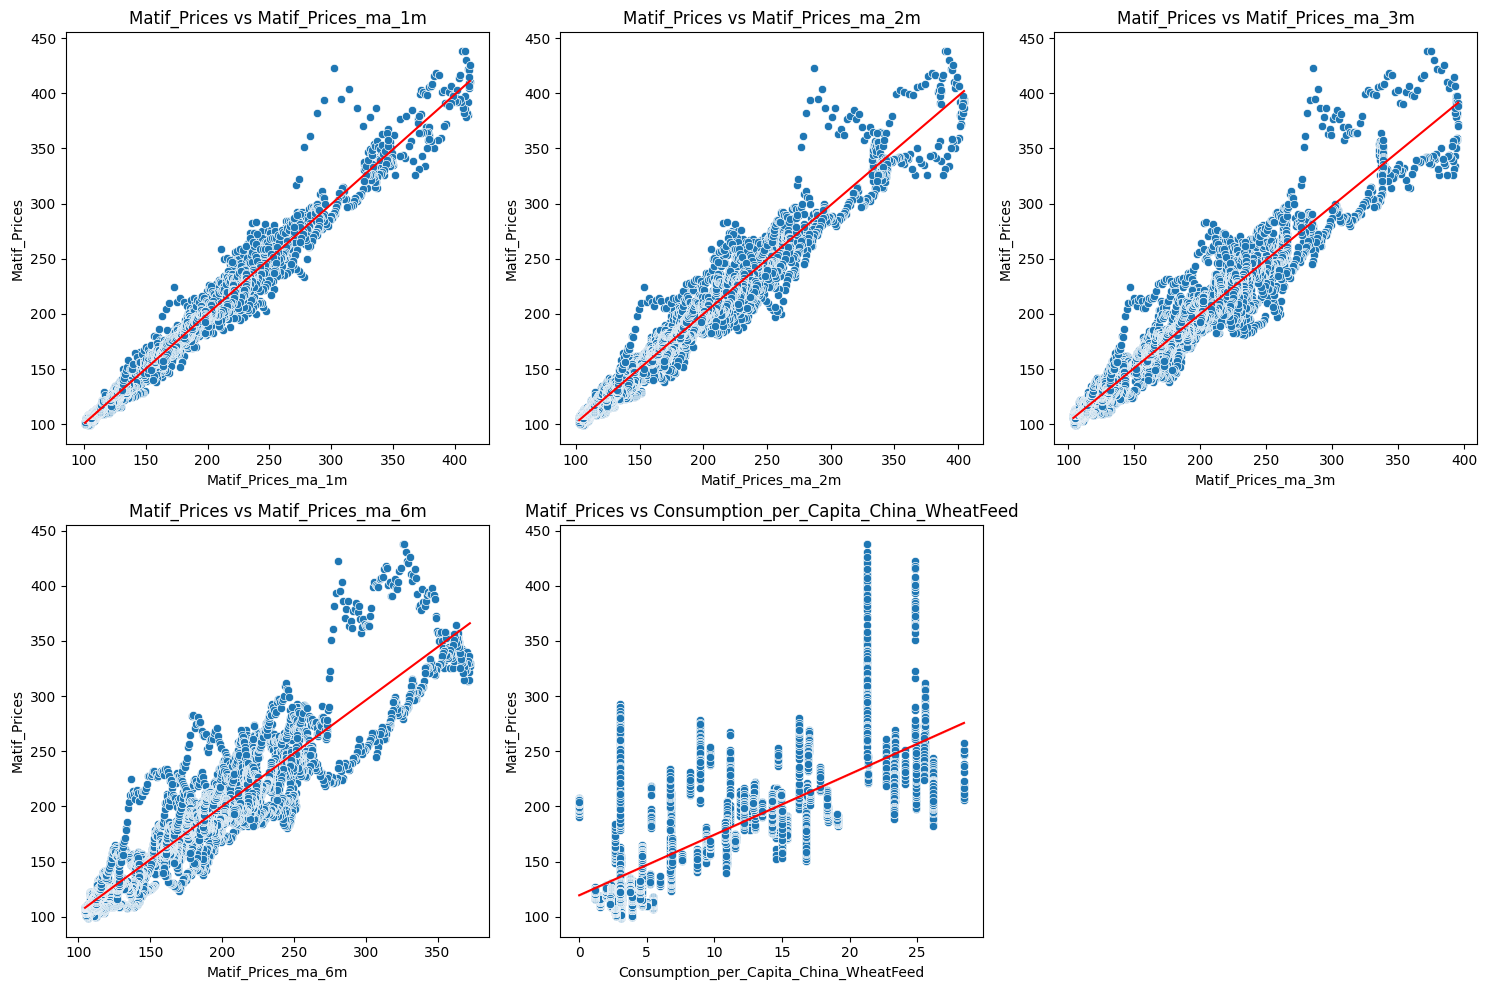

In [8]:
corr_target = df.corr()['Matif_Prices'].sort_values(ascending=False)

top_predictors = corr_target.drop('Matif_Prices').head(5)
print(top_predictors)

top_features = top_predictors.index

plt.figure(figsize=(15,10))

for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='Matif_Prices')
    sns.lineplot(x=df[col], y=df[col]*corr[col]['Matif_Prices']/df[col].std()*df['Matif_Prices'].std() + df['Matif_Prices'].mean() - corr[col]['Matif_Prices']/df[col].std()*df['Matif_Prices'].std()*df[col].mean(), color='red')
    plt.title(f"Matif_Prices vs {col}")

plt.tight_layout()
plt.show()


### Checking colinearity between features (high values mean features are linear combinations of eachother)

* Ideal 
* Okay 1 < 5
* Problematic > 5 

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric predictors (exclude target)
X = df.drop(columns=['Matif_Prices', 'Period'])  

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                                           Feature           VIF
4        Consumption_To_Production_ME_CoarseGrains           inf
5    Consumption_To_Production_MEwoEU_CoarseGrains           inf
7          Supply_to_Demand_MIwoChina_CoarseGrains  2.975073e+04
1   Supply_to_Demand_World_Less_China_CoarseGrains  1.238156e+04
10       Supply_to_Demand_EU_WheatPlusCoarseGrains  1.223509e+04
22                              Matif_Prices_ma_2m  7.145028e+03
23                              Matif_Prices_ma_3m  4.970511e+03
11          Consumption_per_Capita_EU_CoarseGrains  2.080059e+03
3            Consumption_per_Capita_MEwUS_CornFeed  2.002879e+03
2   Consumption_per_Capita_US_Wheat_+_CoarseGrains  1.826211e+03
21                              Matif_Prices_ma_1m  1.550647e+03
8              Stock_to_Use_MIwoChina_CoarseGrains  1.248629e+03
15                                    GDP_deflator  1.232576e+03
9          Stock_per_Capita_MIwoChina_CoarseGrains  8.661345e+02
12             Consumptio

/Users/svetozarmiloshevski/Svetozar Personal/PERSONAL PROJECTS/MY REPO/personal-projects/trading/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Visual representation of linearity in variables

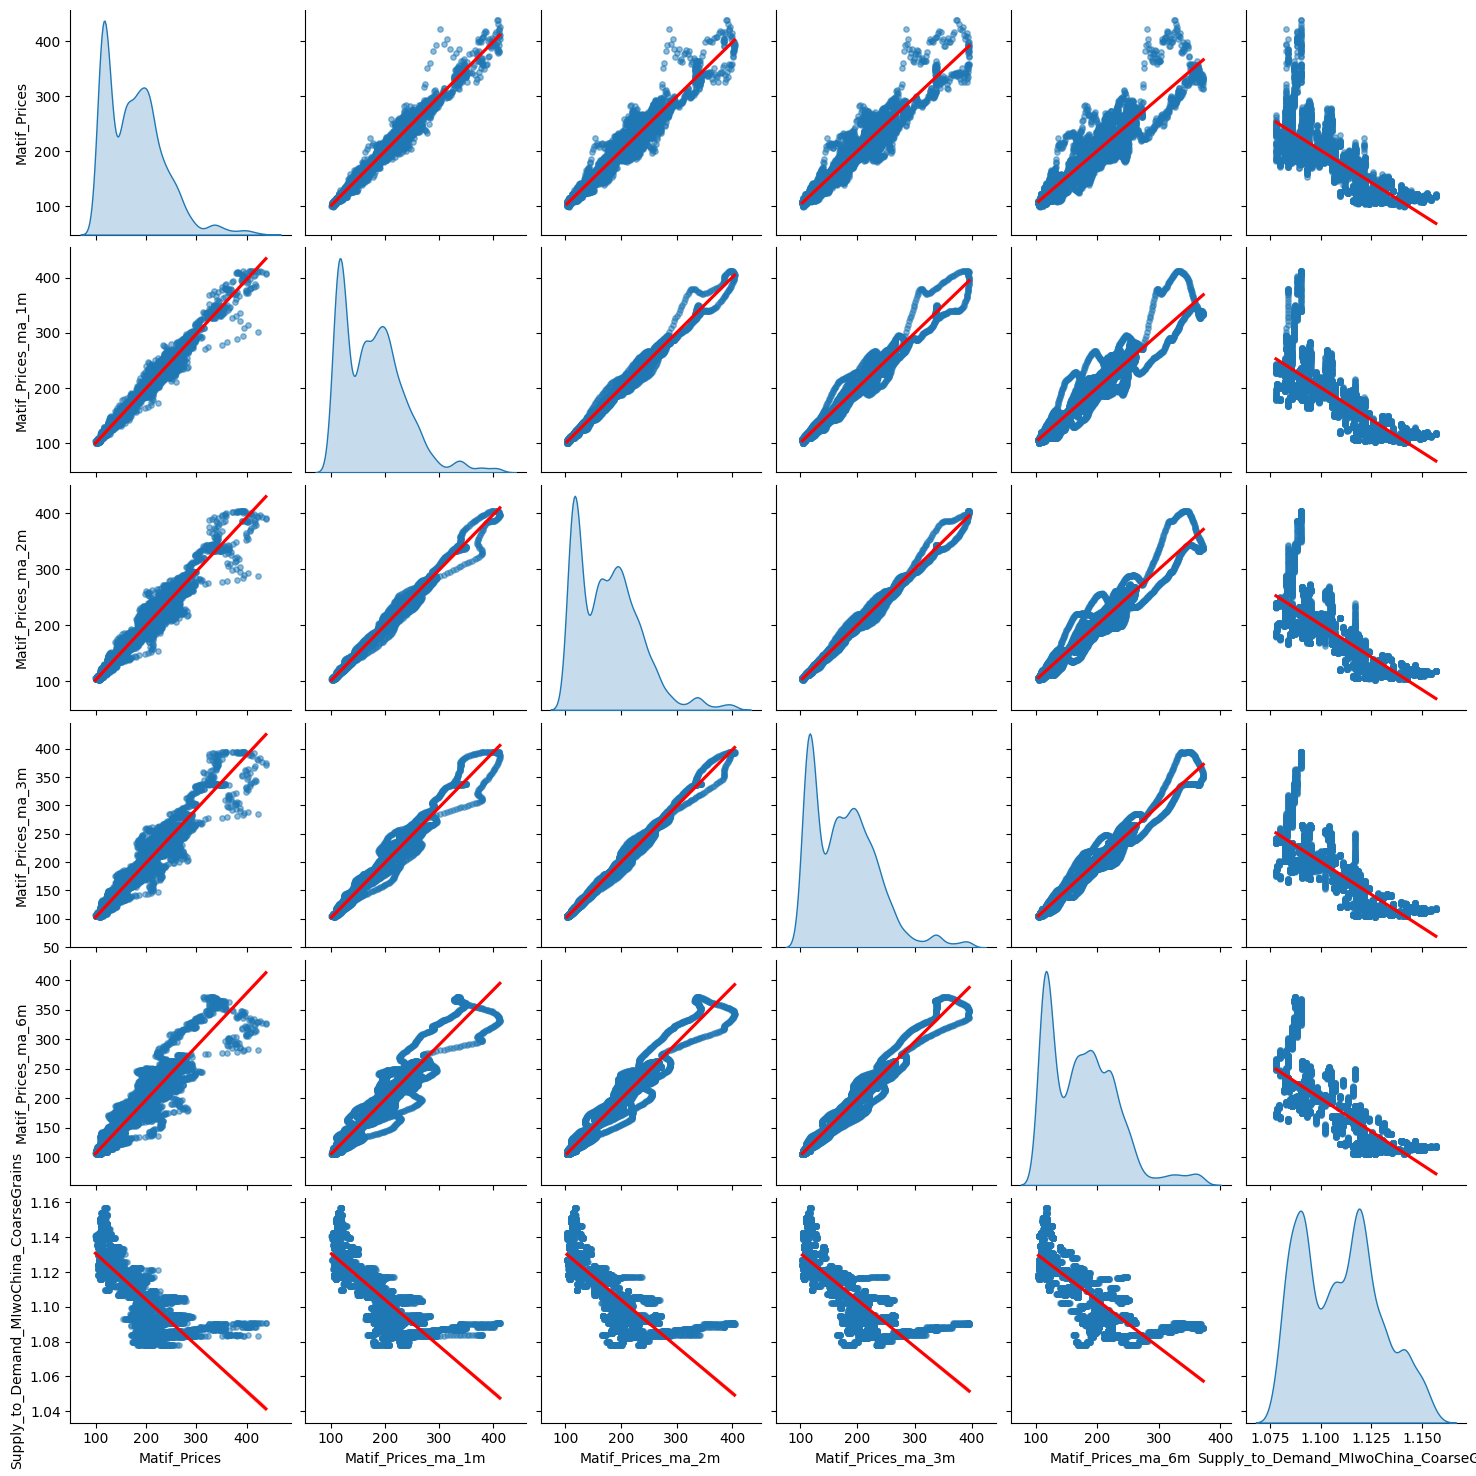

In [10]:
top_corr = df.corr()['Matif_Prices'].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr], kind="reg", diag_kind="kde",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s':15, 'alpha':0.5}})
plt.show()


# Principal Component Analysis

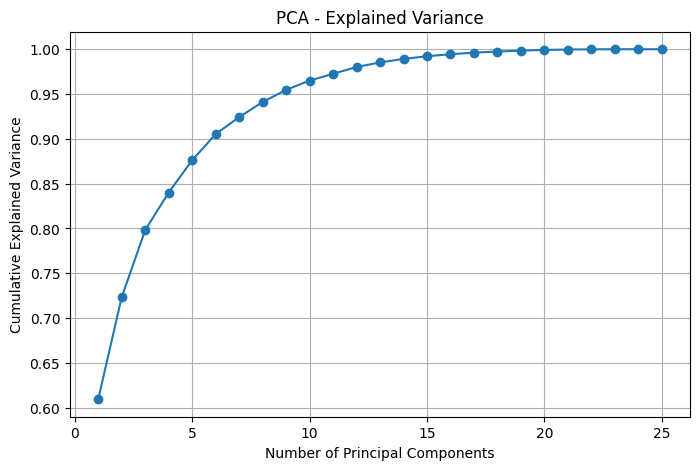

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['Matif_Prices', 'Period'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(X.columns))],
    index=X.columns
)

### Inspecting correlation to Target

/var/folders/nl/8bkjfnbd2k53t1p3_gjy6k9h0000gn/T/ipykernel_8641/575596650.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


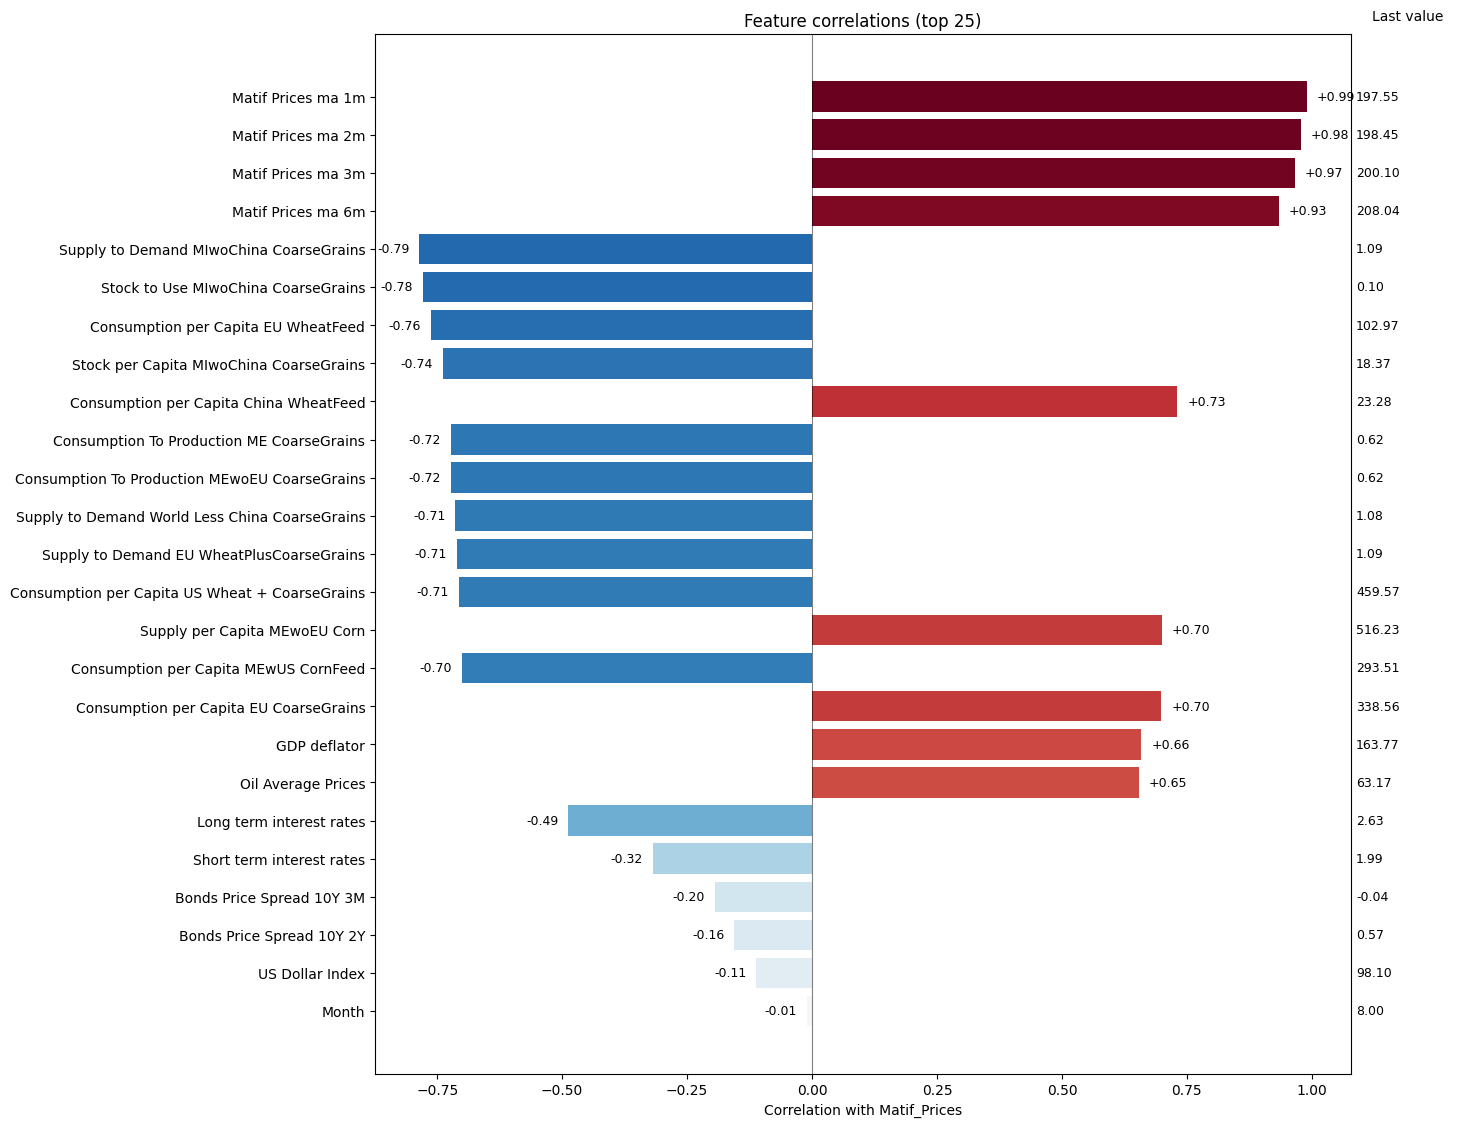

In [17]:
import numpy as np
import matplotlib.pyplot as plt

target = "Matif_Prices"
top_n  = 25 

corr = (df.corr(numeric_only=True)[target].drop(target, errors="ignore").dropna())

order = corr.abs().sort_values(ascending=False).head(top_n).index
corr  = corr.loc[order]
last  = df.loc[df.index.max(), order]

labels = [s.replace("_"," ") for s in order]
y = np.arange(len(order))

fig = plt.figure(figsize=(14, 0.5*len(order)+1))
gs = fig.add_gridspec(nrows=1, ncols=10, wspace=0.05)
ax = fig.add_subplot(gs[0, :9])
ax_txt = fig.add_subplot(gs[0, 9])

cmap = plt.cm.RdBu_r# bars colored by correlation sign/magnitude
norm = plt.Normalize(-1, 1)
bars = ax.barh(y, corr.values, color=cmap(norm(corr.values)), edgecolor="none")

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel(f"Correlation with {target}")
ax.set_title(f"Feature correlations (top {len(order)})")
ax.axvline(0, color="k", lw=0.8, alpha=0.5)

for yi, v in enumerate(corr.values):
    ax.text(v + (0.02 if v >= 0 else -0.02), yi, f"{v:+.2f}",
            va="center", ha="left" if v >= 0 else "right", fontsize=9)

ax_txt.set_ylim(ax.get_ylim())
ax_txt.set_xlim(0, 1)
ax_txt.axis("off")
ax_txt.set_title("Last value", fontsize=10, pad=10)
for yi, val in enumerate(last.values):
    ax_txt.text(0, yi, f"{val:,.2f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()


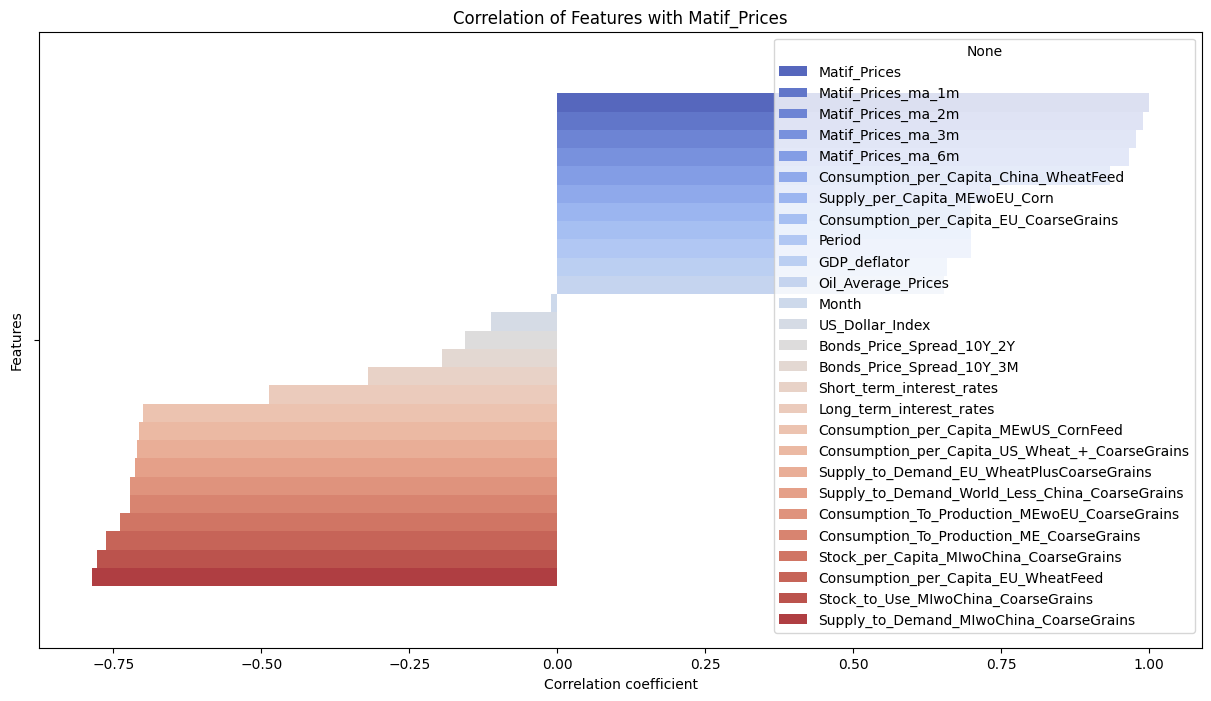

Matif_Prices                                      1.000000
Matif_Prices_ma_1m                                0.989415
Matif_Prices_ma_2m                                0.977803
Matif_Prices_ma_3m                                0.966014
Matif_Prices_ma_6m                                0.933620
Consumption_per_Capita_China_WheatFeed            0.730971
Supply_per_Capita_MEwoEU_Corn                     0.699938
Consumption_per_Capita_EU_CoarseGrains            0.698655
Period                                            0.698647
GDP_deflator                                      0.658486
Oil_Average_Prices                                0.653997
Month                                            -0.009917
US_Dollar_Index                                  -0.111781
Bonds_Price_Spread_10Y_2Y                        -0.155258
Bonds_Price_Spread_10Y_3M                        -0.195169
Short_term_interest_rates                        -0.318826
Long_term_interest_rates                         -0.4876

In [13]:
corr_target = df.corr()['Matif_Prices'].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=corr_target.values, hue=corr_target.index, palette="coolwarm")

plt.title("Correlation of Features with Matif_Prices")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

print(corr_target)


### Checking feature importance through built in function of 3 different models

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Matif_Prices','Period'])
y = df['Matif_Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# LightGBM
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5723
[LightGBM] [Info] Number of data points in the train set: 5531, number of used features: 25
[LightGBM] [Info] Start training from score 178.104449


LGBMRegressor(random_state=42)

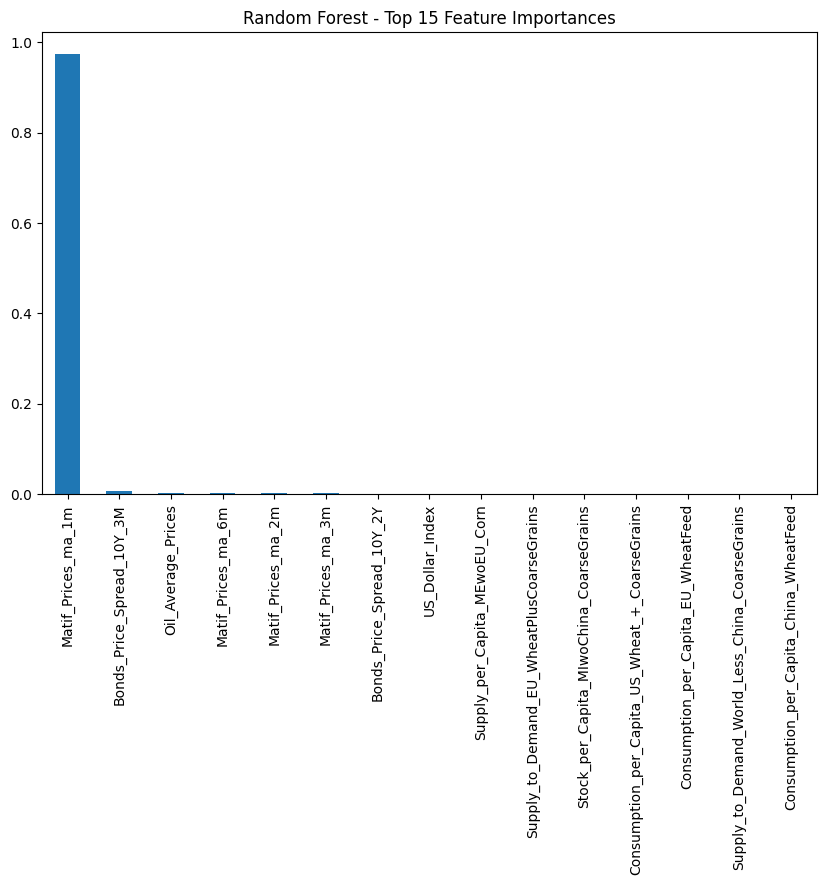

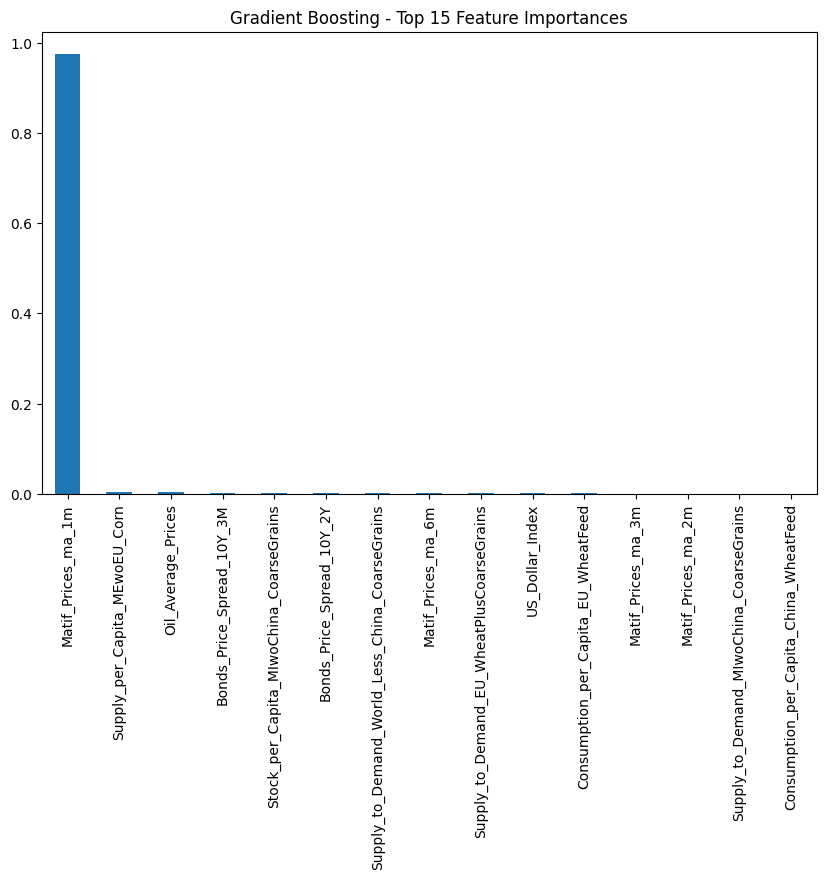

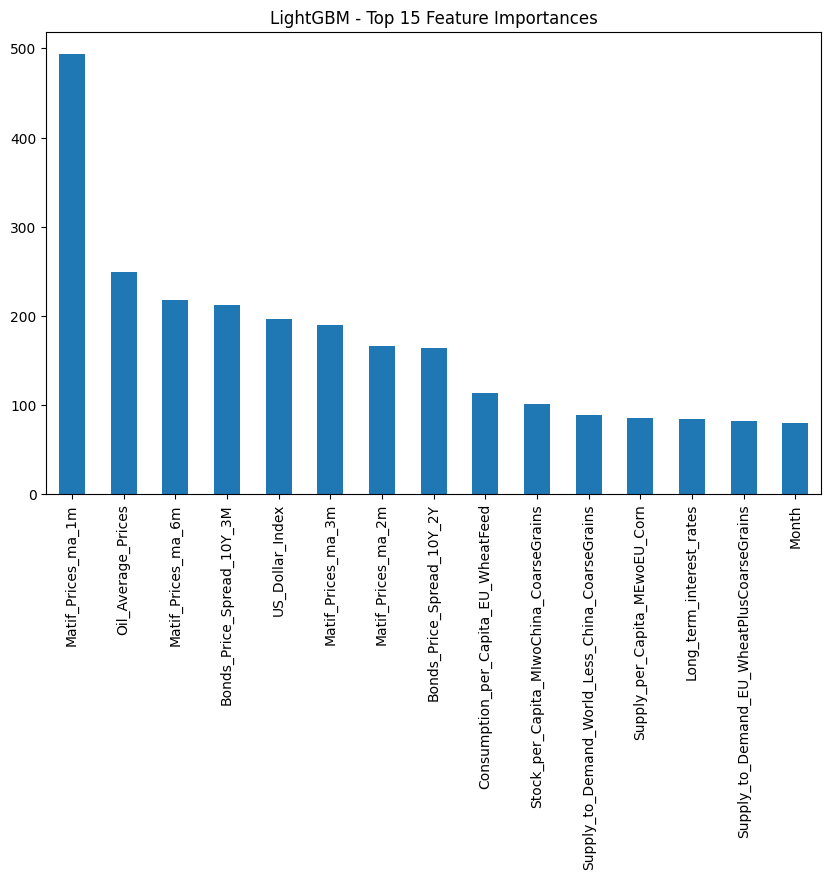

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_importances(model, model_name):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)
    
    plt.figure(figsize=(10,6))
    importances.head(15).plot(kind='bar')
    plt.title(f"{model_name} - Top 15 Feature Importances")
    plt.show()
    return importances

rf_imp = plot_importances(rf, "Random Forest")
gb_imp = plot_importances(gb, "Gradient Boosting")
lgbm_imp = plot_importances(lgbm, "LightGBM")


### Shap tells you how much each feature contributed to moving away from the average prediction (average Matif PRice here)

/Users/svetozarmiloshevski/Svetozar Personal/PERSONAL PROJECTS/MY REPO/personal-projects/trading/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


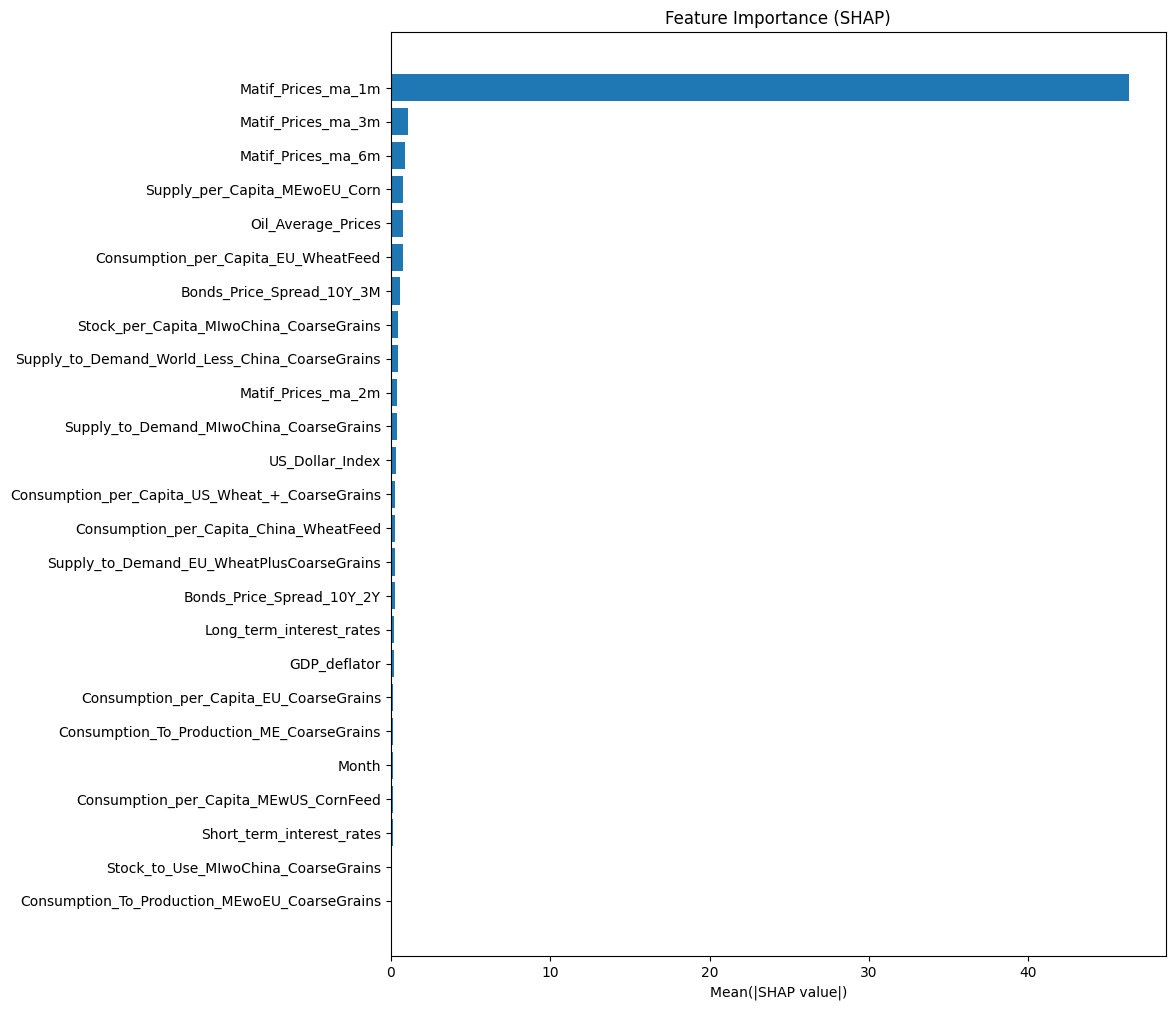

In [18]:
import tqdm as notebook_tqdm
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train)

shap_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": np.abs(shap_values).mean(axis=0)
}).sort_values(by="importance", ascending=True)

plt.figure(figsize=(10,12))
plt.barh(shap_importance["feature"], shap_importance["importance"])
plt.xlabel("Mean(|SHAP value|)")
plt.title("Feature Importance (SHAP)")
plt.show()


### Quick check on a bunch of models to decide which one is the ebst

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import catboost as cb


X = df.drop(columns=['Matif_Prices','Period'])
y = df['Matif_Prices']

tscv = TimeSeriesSplit(n_splits=5)

linear_models = {
    "LinearRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    "Ridge": Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.001, max_iter=100000))
    ])
}
tree_models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42, eval_metric='rmse'),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())
scorer = make_scorer(rmse, greater_is_better=False)

results = {}

for name, model in {**linear_models, **tree_models}.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring=scorer)
    results[name] = -scores.mean()  # convert back to positive RMSE

results_df = pd.DataFrame(results, index=["RMSE"]).T.sort_values("RMSE")
print(results_df)


                       RMSE
Ridge             10.383027
Lasso             11.413209
LinearRegression  12.233487
RandomForest      23.754899
XGBoost           24.805660
GradientBoosting  25.664092
CatBoost          26.897921


### Taking Gradient Boosting and tuning the hyperparams

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

param_dist = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],           # depth of individual trees
    "subsample": [0.6, 0.8, 1.0],        # stochastic GB
    "max_features": ["sqrt", 0.5, 0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "loss": ["squared_error", "absolute_error", "huber"],  # huber is robust to outliers
    "alpha": [0.85, 0.9, 0.95]           # used when loss="huber" (ignored otherwise)
}

gbr = GradientBoostingRegressor(random_state=42)

tscv = TimeSeriesSplit(n_splits=5)

search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X, y)

print("Best params:", search.best_params_)
print("Best RMSE:", -search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END alpha=0.9, learning_rate=0.01, loss=squared_error, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END alpha=0.9, learning_rate=0.01, loss=squared_error, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.9s
[CV] END alpha=0.9, learning_rate=0.01, loss=squared_error, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   1.3s
[CV] END alpha=0.85, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=0.8, min_samples_leaf=2, min_samples_split=10, n_estimators=400, subsample=1.0; total time=   1.7s
[CV] END alpha=0.9, learning_rate=0.01, loss=squared_error, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   1.7s
[CV] END alpha=0

### Display model with best hyperaparams

In [ ]:
import matplotlib.pyplot as plt

use_PCA = False

X = df.drop(columns=['Matif_Prices','Period'])
y = df['Matif_Prices']

split_idx = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# transforming the target can sometimes help
# y_log = np.log1p(y_train)
# best_model.fit(X_train, y_log)
# y_pred_unlog = best_model.predict(X_test)
# y_pred = np.expm1(y_pred_unlog)
if not use_PCA:
    best_model = GradientBoostingRegressor(**search.best_params_, random_state=42)
    best_model.fit(X_train, y_train)

    y_pred_train = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)
else:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_scaled)

    X_test_scaled = scaler.transform(X_test)
    X_test_pca = pca.transform(X_test_scaled)

    pca_model = GradientBoostingRegressor(**search.best_params_, random_state=42)
    pca_model.fit(X_train_pca, y_train)

    y_pred_train = pca_model.predict(X_train_pca)
    y_pred = pca_model.predict(X_test_pca)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mse_in_sample = mean_squared_error(y_train, y_pred_train)
rmse_in_sample = np.sqrt(mse_in_sample)
mae_in_sample = mean_absolute_error(y_train, y_pred_train)
mape_in_sample = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print("Test:")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
print("In-Sample")
print(f"MSE: {mse_in_sample:.2f}, RMSE: {rmse_in_sample:.2f}, MAE: {mae_in_sample:.2f}, MAPE: {mape_in_sample:.2f}%")

Test:
MSE: 1831.96, RMSE: 42.80, MAE: 23.73, MAPE: 7.73%
In-Sample
MSE: 28.86, RMSE: 5.37, MAE: 3.58, MAPE: 2.12%


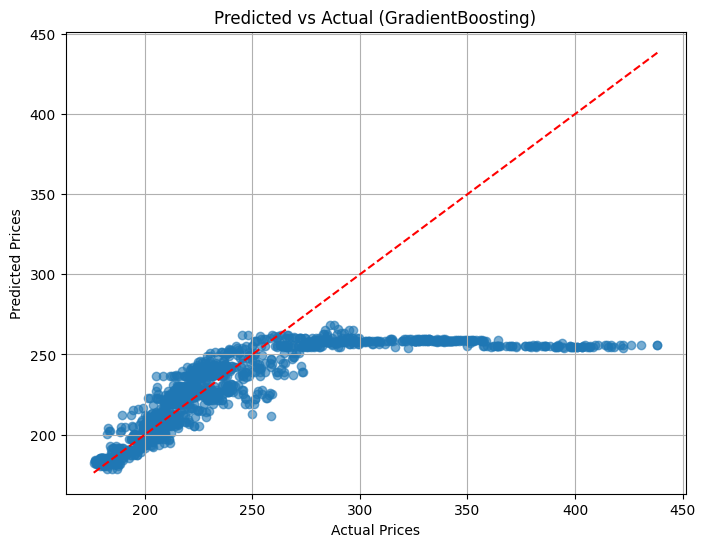

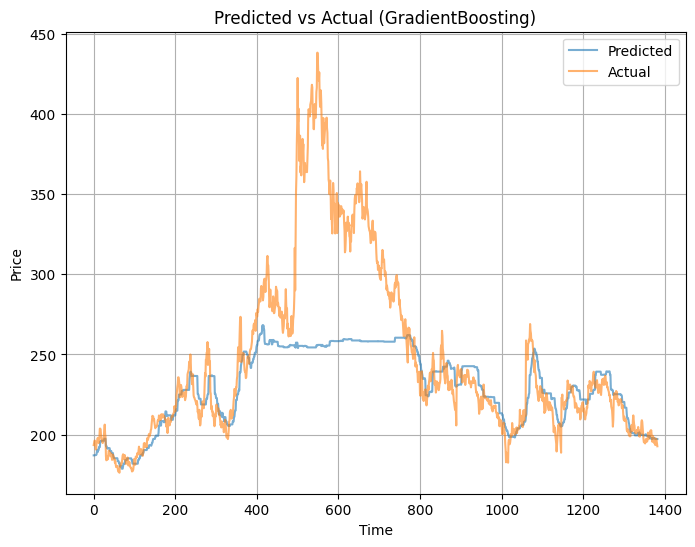

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (GradientBoosting)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(y_pred, alpha=0.6, label="Predicted")
plt.plot(y_test.values, alpha=0.6, label="Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Predicted vs Actual (GradientBoosting)")
plt.legend()
plt.grid(True)
plt.show()

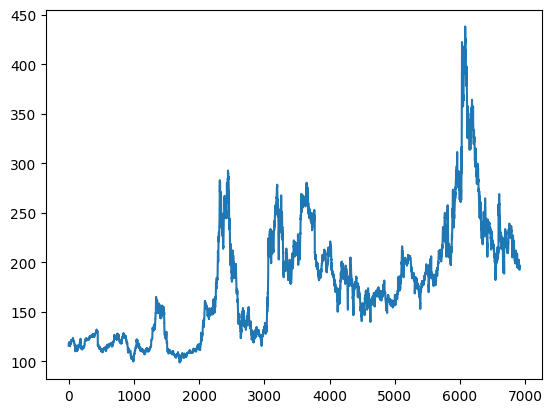

In [ ]:
plt.plot(y)

### Residual analysis, if the residuals have a normal distribution then it is likely that there is no overfiting, i.e. no pattern in the mistakes

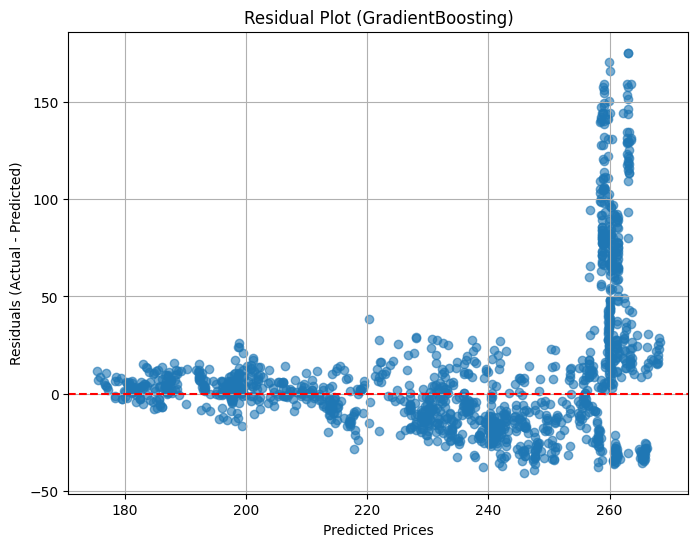

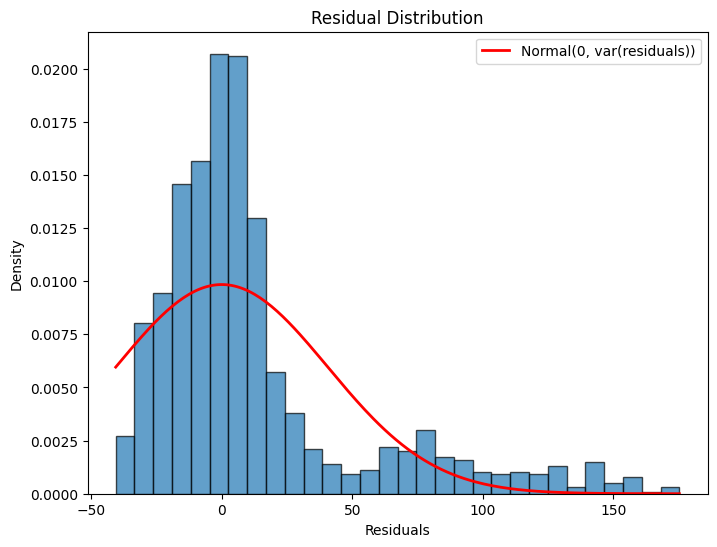

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (GradientBoosting)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor="k", alpha=0.7, density=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")

mu = 0
sigma = np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 200)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)), color='red', lw=2, label='Normal(0, var(residuals))')
plt.legend()
plt.show()


### Most important features to the Best Model

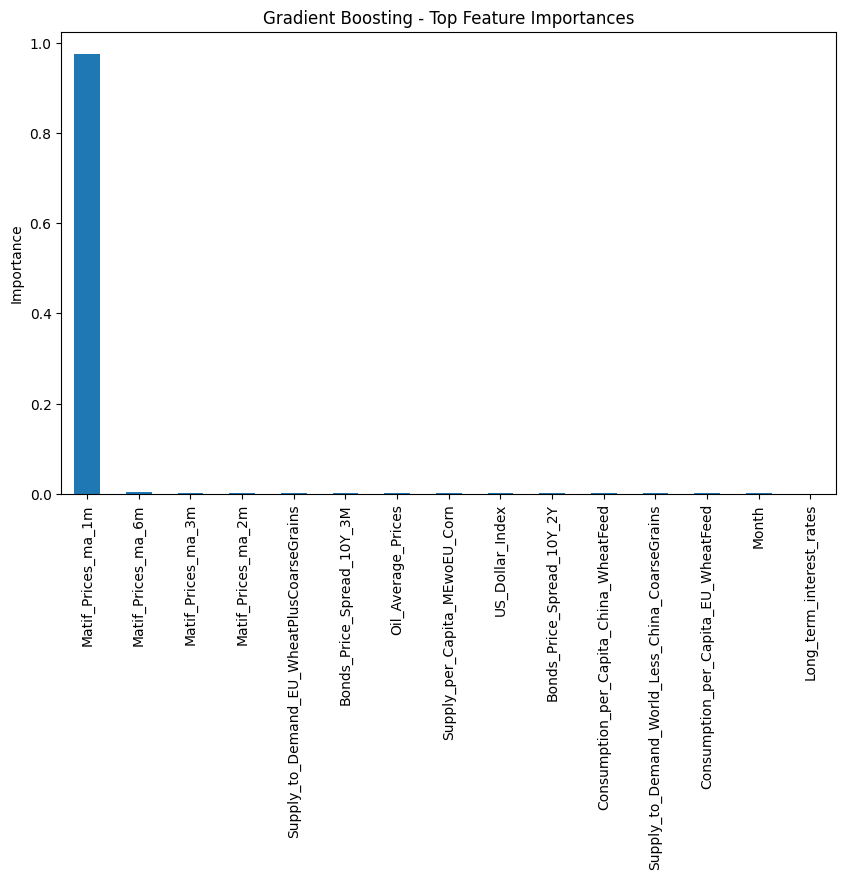

In [ ]:
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='bar')
plt.title("Gradient Boosting - Top Feature Importances")
plt.ylabel("Importance")
plt.show()


### Global and Local importances of the features using Shapley

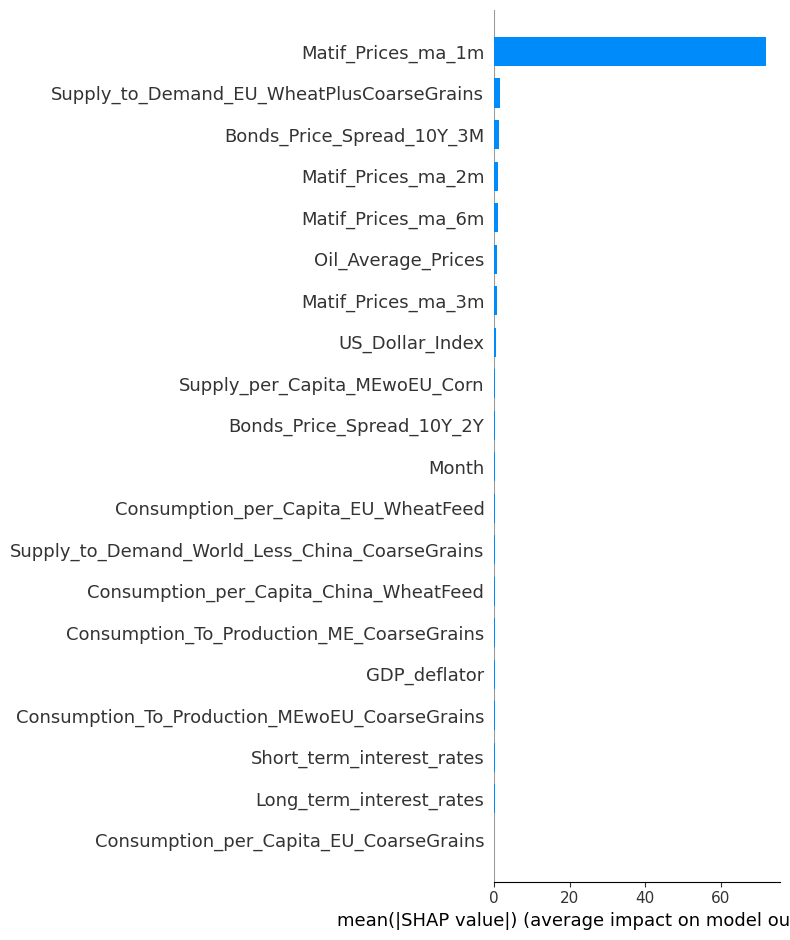

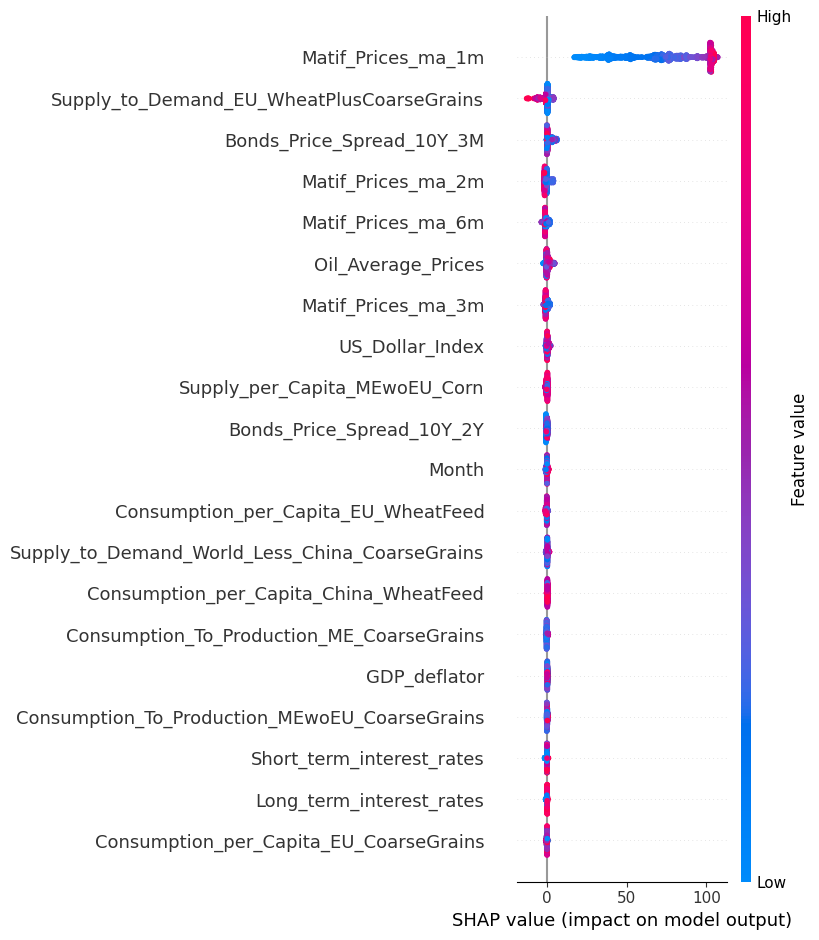

In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


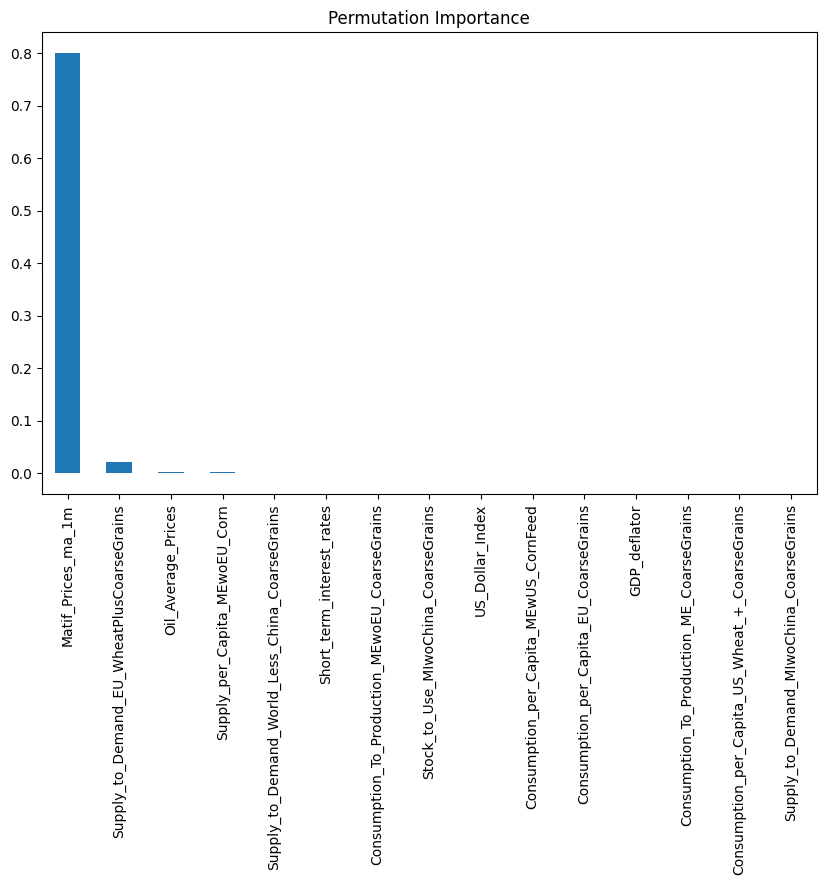

In [ ]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

pd.Series(perm_imp.importances_mean, index=X.columns).sort_values(ascending=False).head(15).plot(kind="bar", figsize=(10,6))
plt.title("Permutation Importance")
plt.show()


In [ ]:
import statsmodels.api as sm

X_const = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Matif_Prices   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.637e+04
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:39:02   Log-Likelihood:                -23855.
No. Observations:                6914   AIC:                         4.776e+04
Df Residuals:                    6889   BIC:                         4.793e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

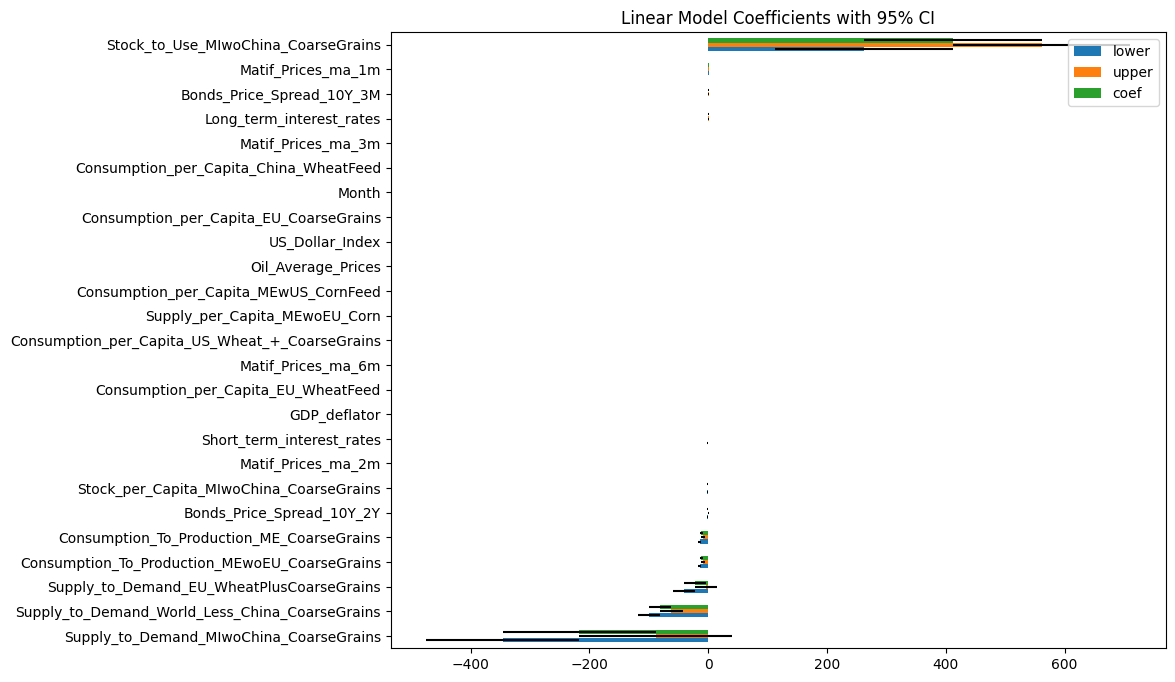

In [ ]:
coef_df = model.conf_int()
coef_df.columns = ["lower", "upper"]
coef_df["coef"] = model.params

coef_df[1:].sort_values("coef").plot(kind="barh", figsize=(10,8), xerr=(coef_df["upper"]-coef_df["lower"])/2)
plt.title("Linear Model Coefficients with 95% CI")
plt.show()
